In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
df=pd.read_csv("CWC23_all_innings.csv")

In [3]:
df.head(4)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking null values
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [5]:
df.columns


Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')

In [6]:
df['bat_or_bowl'].unique()

array(['bowl', 'bat'], dtype=object)

In [7]:
#splitting the dataset into two dataframes one for bowler and other for batsman
df_bowler=df[df['bat_or_bowl']=='bowl'].rename(columns={'bat_or_bowl':'Bowler'})
df_batsman=df[df['bat_or_bowl']=='bat'].rename(columns={'bat_or_bowl':'Batsman'})

In [73]:
df_batsman.head(2)

,team,player,Batsman,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,inns,4s,6s,sr,not_out,mins,starting_day,starting_month,starting_year
501,AUS,GJ Maxwell (AUS),bat,128,201,0.000000,1.5703,v Afghanistan,Wankhede,2,21.0,10.0,157.03,1.0,181.0,7,11,23
502,SA,Q de Kock (SA),bat,140,174,0.007143,1.2428,v Bangladesh,Wankhede,1,15.0,7.0,124.28,0.0,192.0,24,10,23


In [74]:
df_bowler.head(2)

,team,player,Bowler,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,overs,mdns,econ,inns,starting_day,starting_month,starting_year
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.75,v South Africa,Chennai,10.0,0.0,4.5,2,27,10,23
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.75,v India,Lucknow,10.0,2.0,4.5,1,29,10,23


## Handling the dataframe of bowler

In [10]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             562 non-null    object 
 1   player           562 non-null    object 
 2   Bowler           562 non-null    object 
 3   bb_bf            562 non-null    int64  
 4   runs             562 non-null    int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  562 non-null    float64
 7   runs_per_ball    562 non-null    float64
 8   opposition       562 non-null    object 
 9   ground           562 non-null    object 
 10  start_date       562 non-null    object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             562 non-null    int64  
 15  4s               0 non-null      float64
 16  6s               0 non-null      float64
 17  sr               0 n

In [11]:
df_bowler.columns

Index(['team', 'player', 'Bowler', 'bb_bf', 'runs', 'wkts', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'start_date', 'overs', 'mdns',
       'econ', 'inns', '4s', '6s', 'sr', 'not_out', 'mins'],
      dtype='object')

In [12]:
#droping the useless column
df_bowler.drop(['mins','not_out','sr','4s', '6s'],axis=1,inplace=True)

In [75]:
df_bowler.head(2)

,team,player,Bowler,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,overs,mdns,econ,inns,starting_day,starting_month,starting_year
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.75,v South Africa,Chennai,10.0,0.0,4.5,2,27,10,23
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.75,v India,Lucknow,10.0,2.0,4.5,1,29,10,23


In [14]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 1407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             562 non-null    object 
 1   player           562 non-null    object 
 2   Bowler           562 non-null    object 
 3   bb_bf            562 non-null    int64  
 4   runs             562 non-null    int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  562 non-null    float64
 7   runs_per_ball    562 non-null    float64
 8   opposition       562 non-null    object 
 9   ground           562 non-null    object 
 10  start_date       562 non-null    object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             562 non-null    int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 70.2+ KB


In [15]:
#splitting one columns into seprate columns for changing its data type from object to int
df_bowler['starting_day']=df_bowler['start_date'].str.split('-').str[0]
df_bowler['starting_month']=df_bowler['start_date'].str.split('-').str[1]
df_bowler['starting_year']=df_bowler['start_date'].str.split('-').str[2]

In [16]:
df_bowler['starting_month'].unique()

array(['Oct', 'Nov'], dtype=object)

In [17]:
df_bowler['starting_month']=df_bowler['starting_month'].map({'Oct':10,'Nov':11}).astype(int)
df_bowler['starting_day']=df_bowler['starting_day'].astype(int)
df_bowler['starting_year']=df_bowler['starting_year'].astype(int)

In [18]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 1407
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             562 non-null    object 
 1   player           562 non-null    object 
 2   Bowler           562 non-null    object 
 3   bb_bf            562 non-null    int64  
 4   runs             562 non-null    int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  562 non-null    float64
 7   runs_per_ball    562 non-null    float64
 8   opposition       562 non-null    object 
 9   ground           562 non-null    object 
 10  start_date       562 non-null    object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             562 non-null    int64  
 15  starting_day     562 non-null    int32  
 16  starting_month   562 non-null    int32  
 17  starting_year    562

In [19]:
# after splitting start_date column dropping it.....
df_bowler.drop('start_date',axis=1,inplace=True)

In [76]:
df_bowler.head(2)

,team,player,Bowler,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,overs,mdns,econ,inns,starting_day,starting_month,starting_year
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.75,v South Africa,Chennai,10.0,0.0,4.5,2,27,10,23
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.75,v India,Lucknow,10.0,2.0,4.5,1,29,10,23


In [21]:
# finding the result for all bowler wickets taken in all inning
total_wktsIn_inns=df_bowler.groupby('player').agg({'wkts':'sum','inns':'sum'}).reset_index()
total_wktsIn_inns

,player,wkts,inns
0,A Dutt (NED),10.0,13
1,A Zampa (AUS),22.0,15
2,AAP Atkinson (ENG),4.0,5
3,AD Mathews (SL),6.0,8
4,AK Markram (SA),1.0,5
...,...,...,...
97,Tanzim Hasan Sakib (BAN),3.0,1
98,Taskin Ahmed (BAN),5.0,10
99,Usama Mir (PAK),4.0,6
100,V Kohli (IND),1.0,3


In [22]:
# seeing top 10 wickets taker bowler....
top_10_wkts=total_wktsIn_inns.sort_values(by='wkts',ascending=False).head(10)
top_10_wkts

,player,wkts,inns
62,Mohammed Shami (IND),23.0,11
1,A Zampa (AUS),22.0,15
16,D Madushanka (SL),21.0,14
22,G Coetzee (SA),20.0,13
33,JJ Bumrah (IND),18.0,15
88,Shaheen Shah Afridi (PAK),18.0,13
44,M Jansen (SA),17.0,15
52,MJ Santner (NZ),16.0,14
26,Haris Rauf (PAK),16.0,13
76,RA Jadeja (IND),16.0,15


In [23]:
df_bowler.columns

Index(['team', 'player', 'Bowler', 'bb_bf', 'runs', 'wkts', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'overs', 'mdns', 'econ',
       'inns', 'starting_day', 'starting_month', 'starting_year'],
      dtype='object')

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


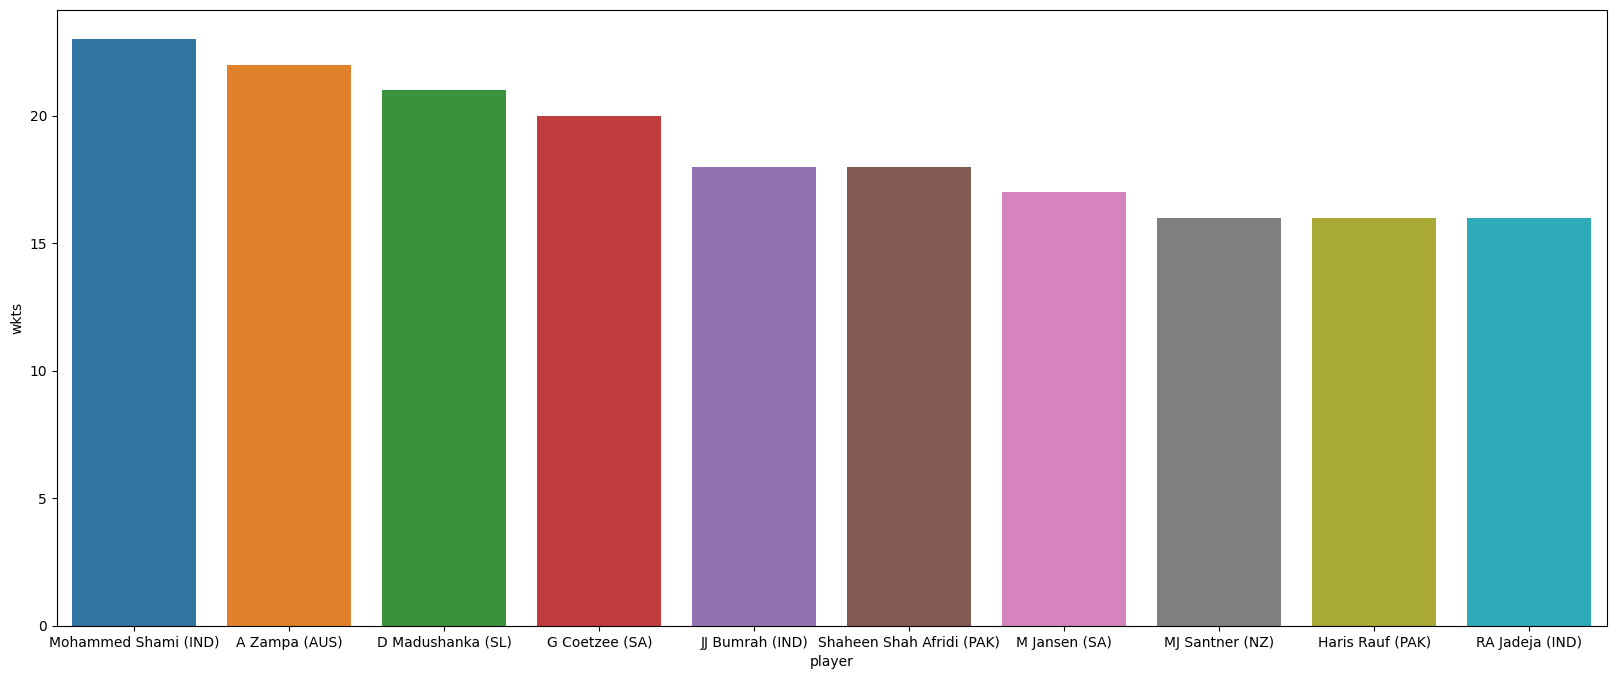

In [24]:
#showing result in graph
plt.rcParams['figure.figsize']=(20,8)
sns.barplot(data=top_10_wkts,x='player',y='wkts')
plt.show()

## observation:
1. No# 1------>Mohammed Shami (IND)
2. No# 2------>A Zampa (AUS)
3. No# 3------>G Coetzee (SA)
4. No# 4------>JJ Bumrah (IND)
5. No# 5------>	Shaheen Shah Afridi (PAK)
..........others are above in table

### Now seeing which team more wickets

In [25]:
# seeing all team record as per wickets
total_team_wktsIn_inns=df_bowler.groupby('team').agg({'wkts':'sum','inns':'sum'}).reset_index()
total_team_wktsIn_inns

,team,wkts,inns
0,AFG,53.0,86
1,AUS,77.0,91
2,BAN,51.0,74
3,ENG,65.0,81
4,IND,94.0,86
5,NED,63.0,84
6,NZ,71.0,87
7,PAK,65.0,75
8,SA,88.0,85
9,SL,50.0,84


In [26]:
# top 10 wickets taker teams 
top_10_team_by_bowl=total_team_wktsIn_inns.sort_values(by='wkts',ascending=False).head(10)
top_10_team_by_bowl

,team,wkts,inns
4,IND,94.0,86
8,SA,88.0,85
1,AUS,77.0,91
6,NZ,71.0,87
3,ENG,65.0,81
7,PAK,65.0,75
5,NED,63.0,84
0,AFG,53.0,86
2,BAN,51.0,74
9,SL,50.0,84


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='team', ylabel='wkts'>

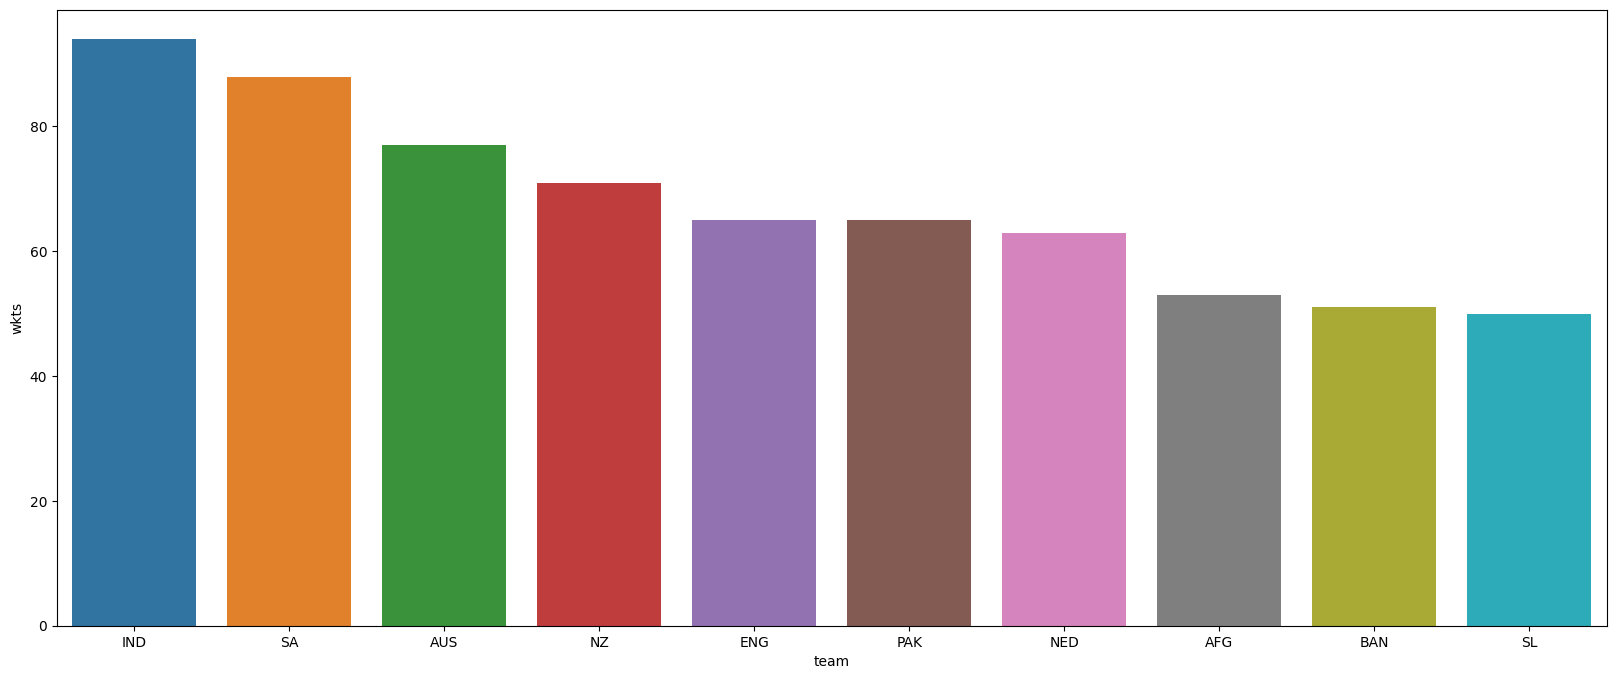

In [27]:
sns.barplot(data=top_10_team_by_bowl,x='team',y='wkts')

## 0bservation:
1. India take 94 wickets in 86 inning
1. SA take 88 wickets in 85 inning
1. AUS take 77 wickets in 91 inning
1. NZ take 71 wickets in 87 inning
1. ENG take 65 wickets in 81 inning

### categorize the bowler on the basis of econmy rate

In [28]:
df_bowler.columns

Index(['team', 'player', 'Bowler', 'bb_bf', 'runs', 'wkts', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'overs', 'mdns', 'econ',
       'inns', 'starting_day', 'starting_month', 'starting_year'],
      dtype='object')

In [29]:
# now categorize the player on the basis of econmy rate
econmy_bowler=df_bowler.groupby('player').agg({'econ':'sum'}).reset_index()
econmy_bowler

,player,econ
0,A Dutt (NED),50.10
1,A Zampa (AUS),53.80
2,AAP Atkinson (ENG),18.13
3,AD Mathews (SL),24.59
4,AK Markram (SA),21.92
...,...,...
97,Tanzim Hasan Sakib (BAN),8.00
98,Taskin Ahmed (BAN),39.43
99,Usama Mir (PAK),28.20
100,V Kohli (IND),8.33


In [30]:
top_10_econmyBoler=econmy_bowler.sort_values(by='econ',ascending=False).head(10)
top_10_econmyBoler

,player,econ
8,Azmatullah Omarzai (AFG),61.86
16,D Madushanka (SL),61.08
26,Haris Rauf (PAK),60.92
19,DM de Silva (SL),59.24
71,PJ Cummins (AUS),59.06
44,M Jansen (SA),58.58
9,BFW de Leede (NED),58.11
23,GD Phillips (NZ),57.11
75,R Ravindra (NZ),56.19
94,TA Boult (NZ),55.35


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


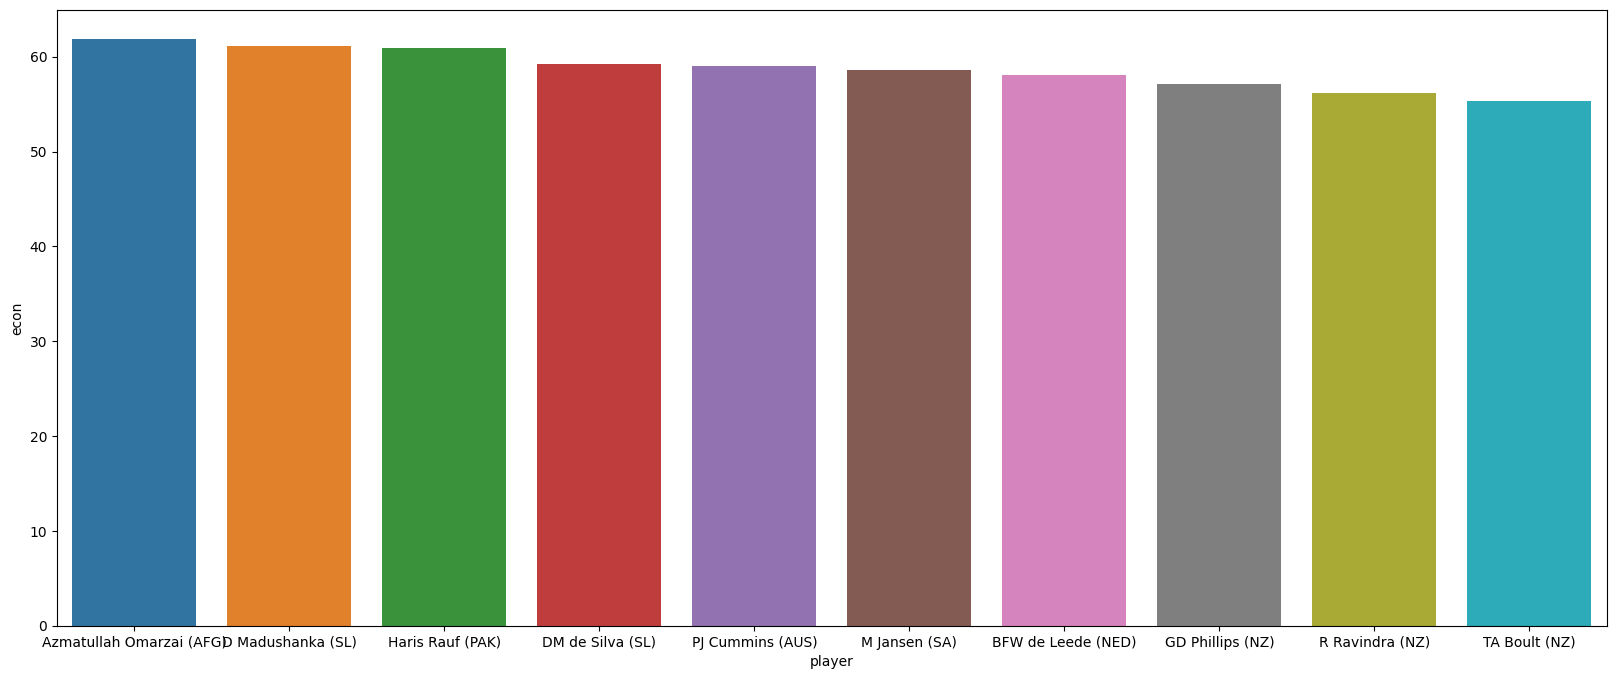

In [31]:
sns.barplot(data=top_10_econmyBoler,x='player',y='econ')
plt.show()

## observation:
1. Azmatullah Omarzai (AFG) with	61.86 econmy rate
2. D Madushanka (SL)	with 61.08 econmy rate
3. Haris Rauf (PAK) with	60.92 econmy rate
4. DM de Silva (SL) with	59.24 econmy rate
5. DM de Silva (SL) with	59.24 econmy rate


#### checking wich bowler deliver how many median overs..

In [32]:
df_bowler.groupby('player').agg({'mdns':'sum'}).reset_index()

,player,mdns
0,A Dutt (NED),6.0
1,A Zampa (AUS),1.0
2,AAP Atkinson (ENG),0.0
3,AD Mathews (SL),2.0
4,AK Markram (SA),1.0
...,...,...
97,Tanzim Hasan Sakib (BAN),0.0
98,Taskin Ahmed (BAN),3.0
99,Usama Mir (PAK),0.0
100,V Kohli (IND),0.0


In [33]:
df_batsman.head()

,team,player,Batsman,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,NaN,0.000000,1.5703,v Afghanistan,Wankhede,7-Nov-23,NaN,NaN,NaN,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,NaN,0.007143,1.2428,v Bangladesh,Wankhede,24-Oct-23,NaN,NaN,NaN,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,NaN,0.008065,1.3145,v Pakistan,Bengaluru,20-Oct-23,NaN,NaN,NaN,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,NaN,0.000000,1.2561,v England,Ahmedabad,5-Oct-23,NaN,NaN,NaN,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,NaN,0.009346,1.3084,v Bangladesh,Dharamsala,10-Oct-23,NaN,NaN,NaN,1,16.0,5.0,130.84,0.0,106.0


In [34]:
bowler_taking_wkts=df_bowler.groupby([ 'player','opposition'])['wkts'].sum().reset_index()
bowler_taking_wkts

,player,opposition,wkts
0,A Dutt (NED),v Afghanistan,0.0
1,A Dutt (NED),v Australia,1.0
2,A Dutt (NED),v Bangladesh,1.0
3,A Dutt (NED),v England,2.0
4,A Dutt (NED),v India,0.0
...,...,...,...
538,V Kohli (IND),v Bangladesh,0.0
539,V Kohli (IND),v Netherlands,1.0
540,Vikramjit Singh (NED),v Australia,0.0
541,Vikramjit Singh (NED),v New Zealand,0.0


In [35]:
top_bowler_against_Otherteam=bowler_taking_wkts.sort_values(by='wkts',ascending=False).reset_index().head(10)
top_bowler_against_Otherteam

,index,player,opposition,wkts
0,357,Mohammed Shami (IND),v New Zealand,12.0
1,481,Shaheen Shah Afridi (PAK),v Australia,5.0
2,441,RA Jadeja (IND),v South Africa,5.0
3,91,D Madushanka (SL),v India,5.0
4,359,Mohammed Shami (IND),v Sri Lanka,5.0
5,277,MA Starc (AUS),v South Africa,5.0
6,302,MJ Santner (NZ),v Netherlands,5.0
7,162,Hasan Ali (PAK),v Sri Lanka,4.0
8,508,T Shamsi (SA),v Pakistan,4.0
9,92,D Madushanka (SL),v Netherlands,4.0


## observation:
1. Muhammad shami takes 12 wickets against NZ.
2. Shaheen Afridi takes 5 wickets against australia.
3. top 10 in above table

In [36]:
# checking the data of any bowler.....Here I like to see Mohammed Shami (IND).
bowler_taking_wkts[bowler_taking_wkts['player']=='Mohammed Shami (IND)']

,player,opposition,wkts
355,Mohammed Shami (IND),v England,4.0
356,Mohammed Shami (IND),v Netherlands,0.0
357,Mohammed Shami (IND),v New Zealand,12.0
358,Mohammed Shami (IND),v South Africa,2.0
359,Mohammed Shami (IND),v Sri Lanka,5.0


In [79]:
wkts_in_ground=df_bowler.groupby(['ground','player','opposition']).agg({'wkts':'max'}).reset_index()
wkts_in_ground

,ground,player,opposition,wkts
0,Ahmedabad,A Zampa (AUS),v England,3.0
1,Ahmedabad,AK Markram (SA),v Afghanistan,0.0
2,Ahmedabad,AL Phehlukwayo (SA),v Afghanistan,1.0
3,Ahmedabad,AU Rashid (ENG),v Australia,2.0
4,Ahmedabad,AU Rashid (ENG),v New Zealand,0.0
...,...,...,...,...
557,Wankhede,Shakib Al Hasan (BAN),v South Africa,1.0
558,Wankhede,Shoriful Islam (BAN),v South Africa,1.0
559,Wankhede,TA Boult (NZ),v India,1.0
560,Wankhede,TG Southee (NZ),v India,3.0


In [80]:
# checking the data of any bowler.....Here I like to see Mohammed Shami (IND).
wkts_in_ground[wkts_in_ground['player']=='Mohammed Shami (IND)']

,ground,player,opposition,wkts
91,Bengaluru,Mohammed Shami (IND),v Netherlands,0.0
265,Dharamsala,Mohammed Shami (IND),v New Zealand,5.0
323,Eden Gardens,Mohammed Shami (IND),v South Africa,2.0
430,Lucknow,Mohammed Shami (IND),v England,4.0
541,Wankhede,Mohammed Shami (IND),v New Zealand,7.0
542,Wankhede,Mohammed Shami (IND),v Sri Lanka,5.0


### In above table we can see the which bowler take how many wickets in wich ground

# EDA for Batsman

In [37]:
# checking the information 
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 501 to 1384
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             846 non-null    object 
 1   player           846 non-null    object 
 2   Batsman          846 non-null    object 
 3   bb_bf            846 non-null    int64  
 4   runs             846 non-null    int64  
 5   wkts             0 non-null      float64
 6   wicketball_prob  846 non-null    float64
 7   runs_per_ball    846 non-null    float64
 8   opposition       846 non-null    object 
 9   ground           846 non-null    object 
 10  start_date       846 non-null    object 
 11  overs            0 non-null      float64
 12  mdns             0 non-null      float64
 13  econ             0 non-null      float64
 14  inns             846 non-null    int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr               8

In [38]:
# dropping extra columns
df_batsman.drop(['wkts','overs','mdns','econ',],axis=1,inplace=True)

In [39]:
df_batsman

,team,player,Batsman,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,start_date,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,0.000000,1.5703,v Afghanistan,Wankhede,7-Nov-23,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,0.007143,1.2428,v Bangladesh,Wankhede,24-Oct-23,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,0.008065,1.3145,v Pakistan,Bengaluru,20-Oct-23,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,0.000000,1.2561,v England,Ahmedabad,5-Oct-23,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,0.009346,1.3084,v Bangladesh,Dharamsala,10-Oct-23,1,16.0,5.0,130.84,0.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.200000,0.2000,v South Africa,Eden Gardens,16-Nov-23,2,0.0,0.0,20.00,0.0,8.0
1381,NZ,TWM Latham (NZ),bat,2,0,0.500000,0.0000,v India,Wankhede,15-Nov-23,2,0.0,0.0,0.00,0.0,1.0
1382,SA,T Bavuma (SA),bat,4,0,0.250000,0.0000,v Australia,Eden Gardens,16-Nov-23,1,0.0,0.0,0.00,0.0,5.0
1383,SA,M Jansen (SA),bat,1,0,1.000000,0.0000,v Australia,Eden Gardens,16-Nov-23,1,0.0,0.0,0.00,0.0,1.0


In [40]:
#splitting one columns into seprate columns for changing its data type from object to int
df_batsman['starting_day']=df_batsman['start_date'].str.split('-').str[0]
df_batsman['starting_month']=df_batsman['start_date'].str.split('-').str[1]
df_batsman['starting_year']=df_batsman['start_date'].str.split('-').str[2]



In [41]:
df_batsman['starting_month']=df_batsman['starting_month'].map({'Oct':10,'Nov':11}).astype(int)
df_batsman['starting_day']=df_batsman['starting_day'].astype(int)
df_batsman['starting_year']=df_batsman['starting_year'].astype(int)

In [42]:
df_batsman.drop('start_date',axis=1,inplace=True)

In [43]:
df_batsman.head()

,team,player,Batsman,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,inns,4s,6s,sr,not_out,mins,starting_day,starting_month,starting_year
501,AUS,GJ Maxwell (AUS),bat,128,201,0.000000,1.5703,v Afghanistan,Wankhede,2,21.0,10.0,157.03,1.0,181.0,7,11,23
502,SA,Q de Kock (SA),bat,140,174,0.007143,1.2428,v Bangladesh,Wankhede,1,15.0,7.0,124.28,0.0,192.0,24,10,23
503,AUS,DA Warner (AUS),bat,124,163,0.008065,1.3145,v Pakistan,Bengaluru,1,14.0,9.0,131.45,0.0,180.0,20,10,23
504,NZ,DP Conway (NZ),bat,121,152,0.000000,1.2561,v England,Ahmedabad,2,19.0,3.0,125.61,1.0,147.0,5,10,23
505,ENG,DJ Malan (ENG),bat,107,140,0.009346,1.3084,v Bangladesh,Dharamsala,1,16.0,5.0,130.84,0.0,106.0,10,10,23


In [44]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 501 to 1384
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             846 non-null    object 
 1   player           846 non-null    object 
 2   Batsman          846 non-null    object 
 3   bb_bf            846 non-null    int64  
 4   runs             846 non-null    int64  
 5   wicketball_prob  846 non-null    float64
 6   runs_per_ball    846 non-null    float64
 7   opposition       846 non-null    object 
 8   ground           846 non-null    object 
 9   inns             846 non-null    int64  
 10  4s               846 non-null    float64
 11  6s               846 non-null    float64
 12  sr               846 non-null    float64
 13  not_out          846 non-null    float64
 14  mins             846 non-null    float64
 15  starting_day     846 non-null    int32  
 16  starting_month   846 non-null    int32  
 17  starting_year    8

#### checking the performance of all the batsman

In [45]:

totalbatsmanperf=df_batsman.groupby('player').agg({'runs':'sum','bb_bf':'sum','sr':'sum','inns':'sum','4s':'sum','6s':'sum'}).reset_index()
totalbatsmanperf

,player,runs,bb_bf,sr,inns,4s,6s
0,A Dutt (NED),70,87,797.28,14,1.0,5.0
1,A Zampa (AUS),48,60,451.38,7,5.0,0.0
2,AAP Atkinson (ENG),37,24,366.66,5,7.0,0.0
3,AD Mathews (SL),51,78,195.71,5,4.0,1.0
4,AK Markram (SA),406,366,1515.25,14,44.0,9.0
...,...,...,...,...,...,...,...
141,Usama Mir (PAK),0,3,0.00,2,0.0,0.0
142,V Kohli (IND),711,784,829.56,15,64.0,9.0
143,Vikramjit Singh (NED),98,150,314.20,9,12.0,1.0
144,W Barresi (NED),83,112,264.67,6,11.0,1.0


In [46]:
# top 10 player runwise
top_10_plByR=totalbatsmanperf.sort_values(by=['runs'],ascending=False).head(10)
top_10_plByR

,player,runs,bb_bf,sr,inns,4s,6s
142,V Kohli (IND),711,784,829.56,15,64.0,9.0
104,Q de Kock (SA),594,555,1065.39,14,57.0,21.0
106,R Ravindra (NZ),578,543,945.67,16,55.0,17.0
26,DJ Mitchell (NZ),552,497,949.88,14,48.0,22.0
109,RG Sharma (IND),550,443,1255.26,15,62.0,28.0
24,DA Warner (AUS),528,491,1081.99,15,49.0,24.0
122,SS Iyer (IND),526,465,930.05,15,36.0,24.0
39,HE van der Dussen (SA),448,530,661.14,14,39.0,8.0
82,MR Marsh (AUS),426,395,743.50,14,42.0,20.0
4,AK Markram (SA),406,366,1515.25,14,44.0,9.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


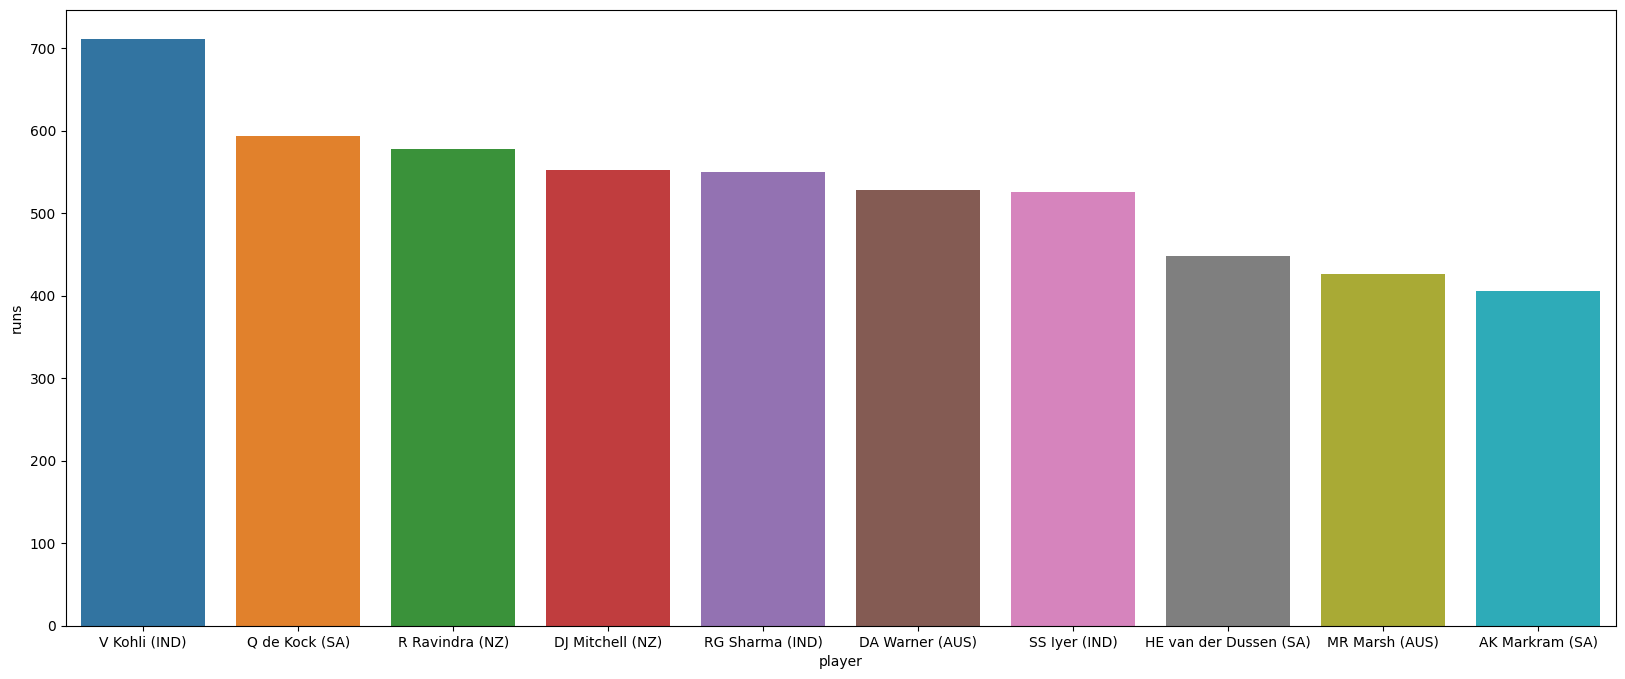

In [47]:
sns.barplot(data=top_10_plByR,x='player',y='runs')
plt.show()

## observation:
#### top player by runwise
1. V Kohli (IND) with  711
2. Q de Kock (SA) with 594 
3. R Ravindra (NZ) with 578
4. DJ Mitchell (NZ) with 552
5. RG Sharma (IND) with 550


#### top 10 batsman strikerate wise

In [48]:
top_10_plBysR=totalbatsmanperf.sort_values(by=['sr'],ascending=False).head(10)
top_10_plBysR

,player,runs,bb_bf,sr,inns,4s,6s
4,AK Markram (SA),406,366,1515.25,14,44.0,9.0
109,RG Sharma (IND),550,443,1255.26,15,62.0,28.0
23,DA Miller (SA),356,330,1233.46,14,25.0,20.0
37,H Klaasen (SA),373,280,1231.95,14,28.0,19.0
24,DA Warner (AUS),528,491,1081.99,15,49.0,24.0
35,GD Phillips (NZ),285,255,1075.90,14,22.0,14.0
104,Q de Kock (SA),594,555,1065.39,14,57.0,21.0
27,DJ Willey (ENG),78,67,983.60,9,7.0,6.0
50,JC Buttler (ENG),138,142,953.19,13,11.0,5.0
26,DJ Mitchell (NZ),552,497,949.88,14,48.0,22.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


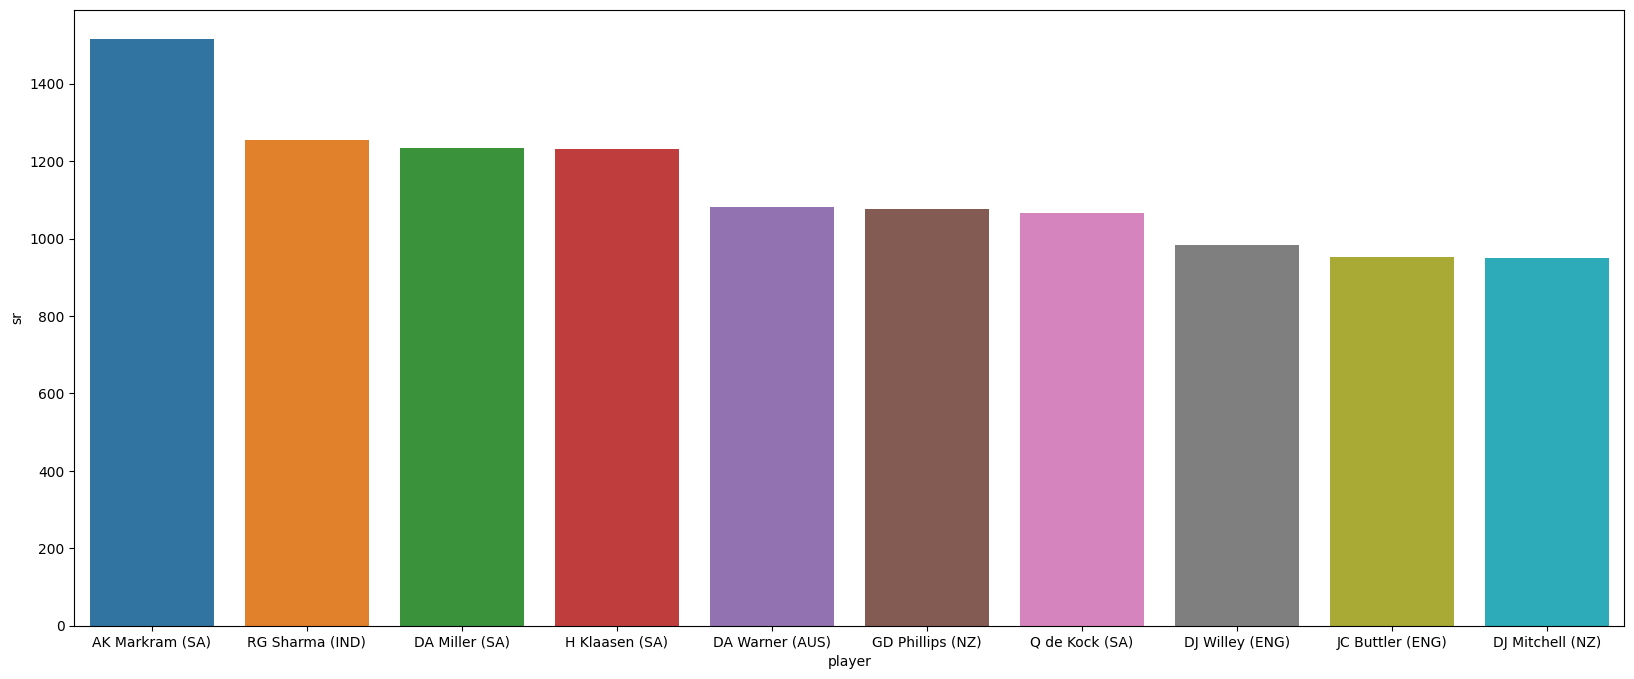

In [49]:
sns.barplot(data=top_10_plBysR,x='player',y='sr')
plt.show()

## observation:
#### top player by runwise

1. AK Markram (SA) with 1515.25
2. RG Sharma (IND) with 1255.26
3. DA Miller (SA) with 1233.46
4. H Klaasen (SA) with 1231.95
5. DA Warner (AUS) with 1081.99

In [50]:
top_10_plBy4s=totalbatsmanperf.sort_values(by=['4s'],ascending=False).head(10)
top_10_plBy4s

,player,runs,bb_bf,sr,inns,4s,6s
142,V Kohli (IND),711,784,829.56,15,64.0,9.0
109,RG Sharma (IND),550,443,1255.26,15,62.0,28.0
104,Q de Kock (SA),594,555,1065.39,14,57.0,21.0
106,R Ravindra (NZ),578,543,945.67,16,55.0,17.0
30,DP Conway (NZ),372,366,874.56,16,54.0,4.0
25,DJ Malan (ENG),404,400,807.03,13,50.0,9.0
24,DA Warner (AUS),528,491,1081.99,15,49.0,24.0
26,DJ Mitchell (NZ),552,497,949.88,14,48.0,22.0
100,P Nissanka (SL),332,371,586.79,13,44.0,3.0
4,AK Markram (SA),406,366,1515.25,14,44.0,9.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


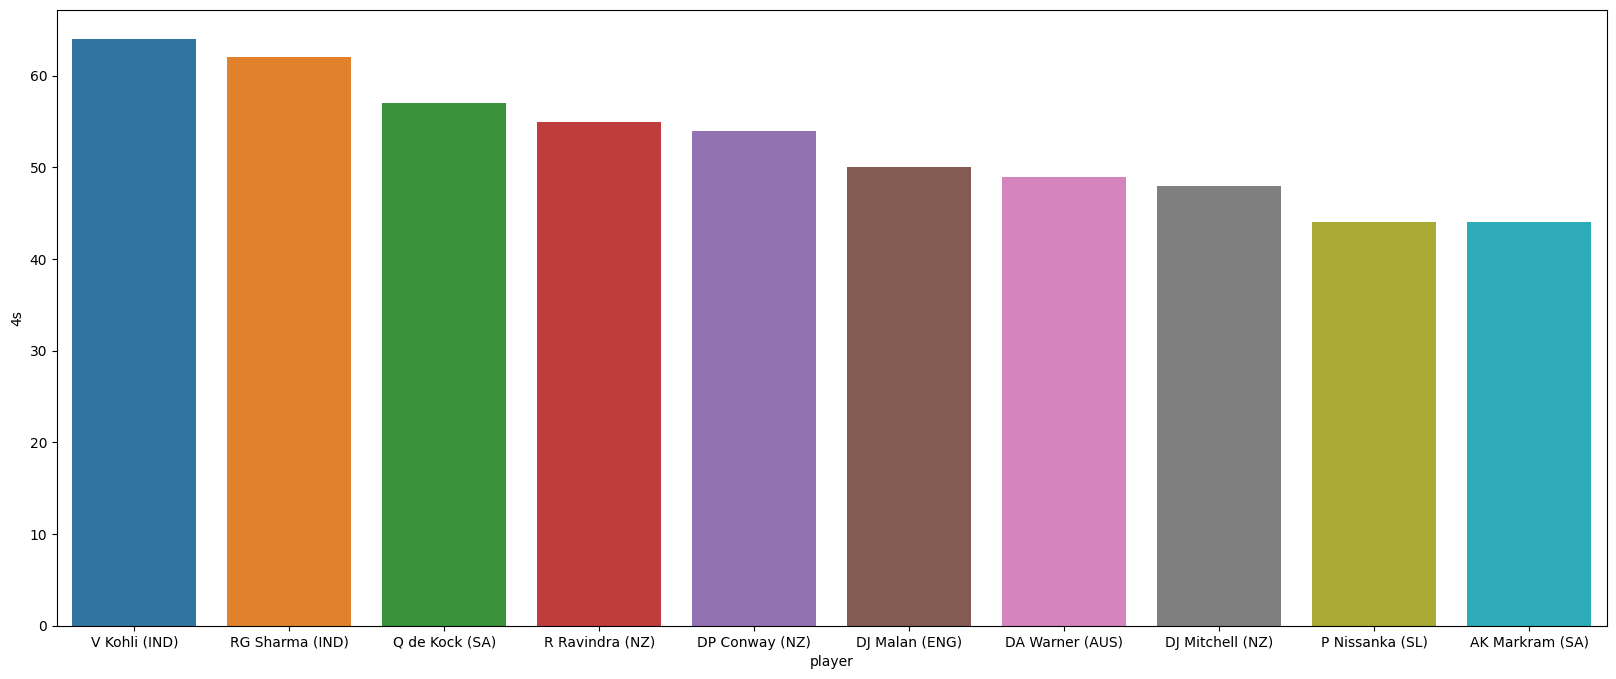

In [51]:
sns.barplot(data=top_10_plBy4s,x='player',y='4s')
plt.show()

## observation:
#### top player by most 4s in total tournament

1. V Kohli (IND) with 64
2. RG Sharma (IND) with 62
3. Q de Kock (SA) with 57
4. R Ravindra (NZ) with 55
5. DP Conway (NZ) with 54

In [52]:
top_10_plBy6s=totalbatsmanperf.sort_values(by=['6s'],ascending=False).head(10)
top_10_plBy6s

,player,runs,bb_bf,sr,inns,4s,6s
109,RG Sharma (IND),550,443,1255.26,15,62.0,28.0
24,DA Warner (AUS),528,491,1081.99,15,49.0,24.0
122,SS Iyer (IND),526,465,930.05,15,36.0,24.0
26,DJ Mitchell (NZ),552,497,949.88,14,48.0,22.0
36,GJ Maxwell (AUS),398,265,814.01,12,40.0,22.0
104,Q de Kock (SA),594,555,1065.39,14,57.0,21.0
23,DA Miller (SA),356,330,1233.46,14,25.0,20.0
82,MR Marsh (AUS),426,395,743.50,14,42.0,20.0
37,H Klaasen (SA),373,280,1231.95,14,28.0,19.0
32,Fakhar Zaman (PAK),220,179,356.11,7,14.0,18.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


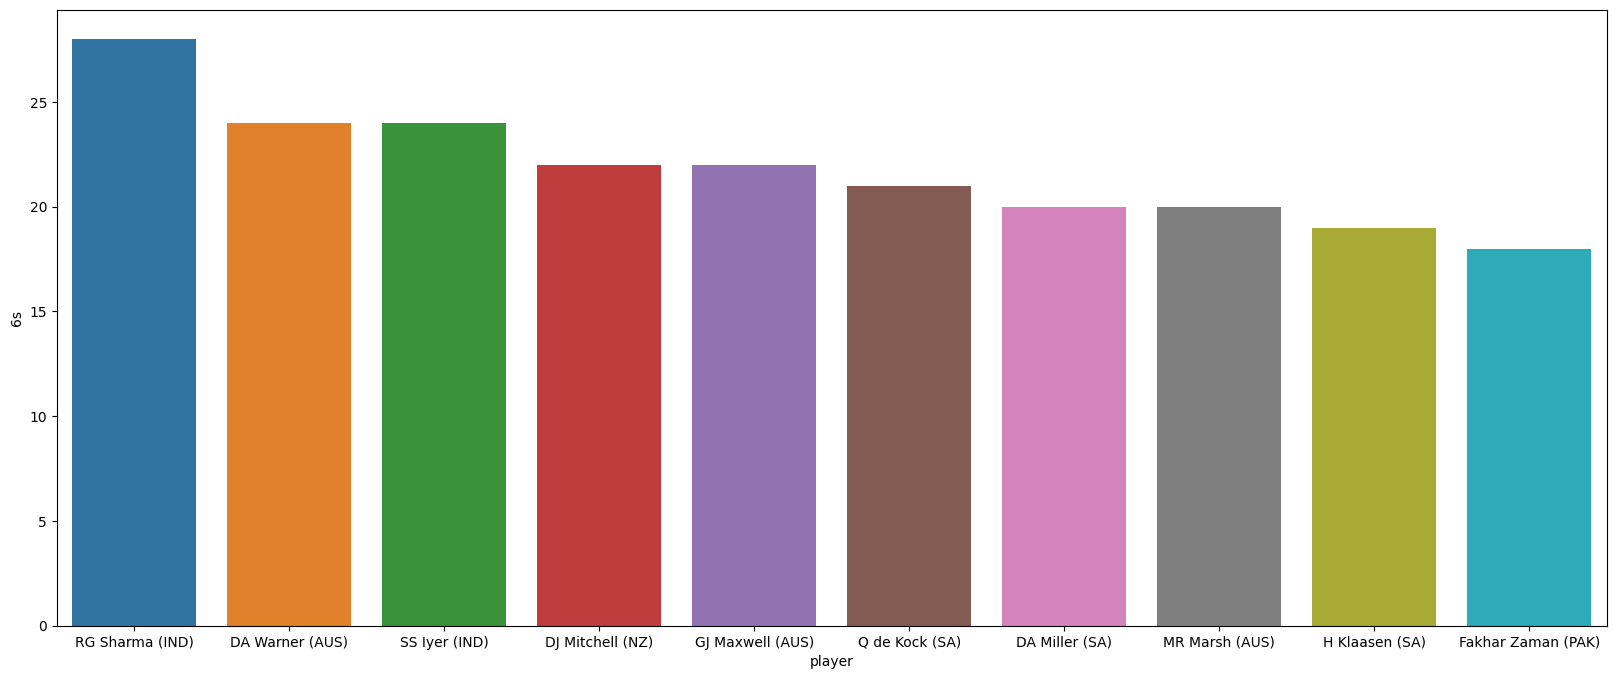

In [53]:
sns.barplot(data=top_10_plBy6s,x='player',y='6s')
plt.show()

## observation:
#### top player by most 6s in total tournament

1. RG Sharma (IND) with 28
2. DA Warner (AUS) with 24
3. SS Iyer (IND) with 24
4. DJ Mitchell (NZ) with 22
5. GJ Maxwell (AUS) with 22

In [54]:
df_batsman.columns

Index(['team', 'player', 'Batsman', 'bb_bf', 'runs', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins', 'starting_day', 'starting_month', 'starting_year'],
      dtype='object')

#### top team performance

In [55]:
allTeamperf=df_batsman.groupby('team').agg({'runs':'sum','bb_bf':'sum','sr':'sum','inns':'sum','4s':'sum','6s':'sum'}).reset_index()

In [56]:
allTeamperf

,team,runs,bb_bf,sr,inns,4s,6s
0,AFG,1990,2392,5745.98,99,178.0,42.0
1,AUS,2722,2787,7958.13,133,265.0,92.0
2,BAN,1944,2459,6569.27,136,188.0,43.0
3,ENG,2135,2277,8761.94,140,216.0,51.0
4,IND,2810,2685,6617.13,94,265.0,89.0
5,NED,1728,2300,6639.31,153,163.0,33.0
6,NZ,2712,2616,7860.37,127,265.0,82.0
7,PAK,2220,2309,6496.43,112,220.0,60.0
8,SA,2773,2787,8564.56,127,243.0,99.0
9,SL,1942,2257,5611.12,117,201.0,45.0


 #####  top 10 team by runwise

In [57]:
top_10_TmByR=allTeamperf.sort_values(by=['runs'],ascending=False).head(10)
top_10_TmByR

,team,runs,bb_bf,sr,inns,4s,6s
4,IND,2810,2685,6617.13,94,265.0,89.0
8,SA,2773,2787,8564.56,127,243.0,99.0
1,AUS,2722,2787,7958.13,133,265.0,92.0
6,NZ,2712,2616,7860.37,127,265.0,82.0
7,PAK,2220,2309,6496.43,112,220.0,60.0
3,ENG,2135,2277,8761.94,140,216.0,51.0
0,AFG,1990,2392,5745.98,99,178.0,42.0
2,BAN,1944,2459,6569.27,136,188.0,43.0
9,SL,1942,2257,5611.12,117,201.0,45.0
5,NED,1728,2300,6639.31,153,163.0,33.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


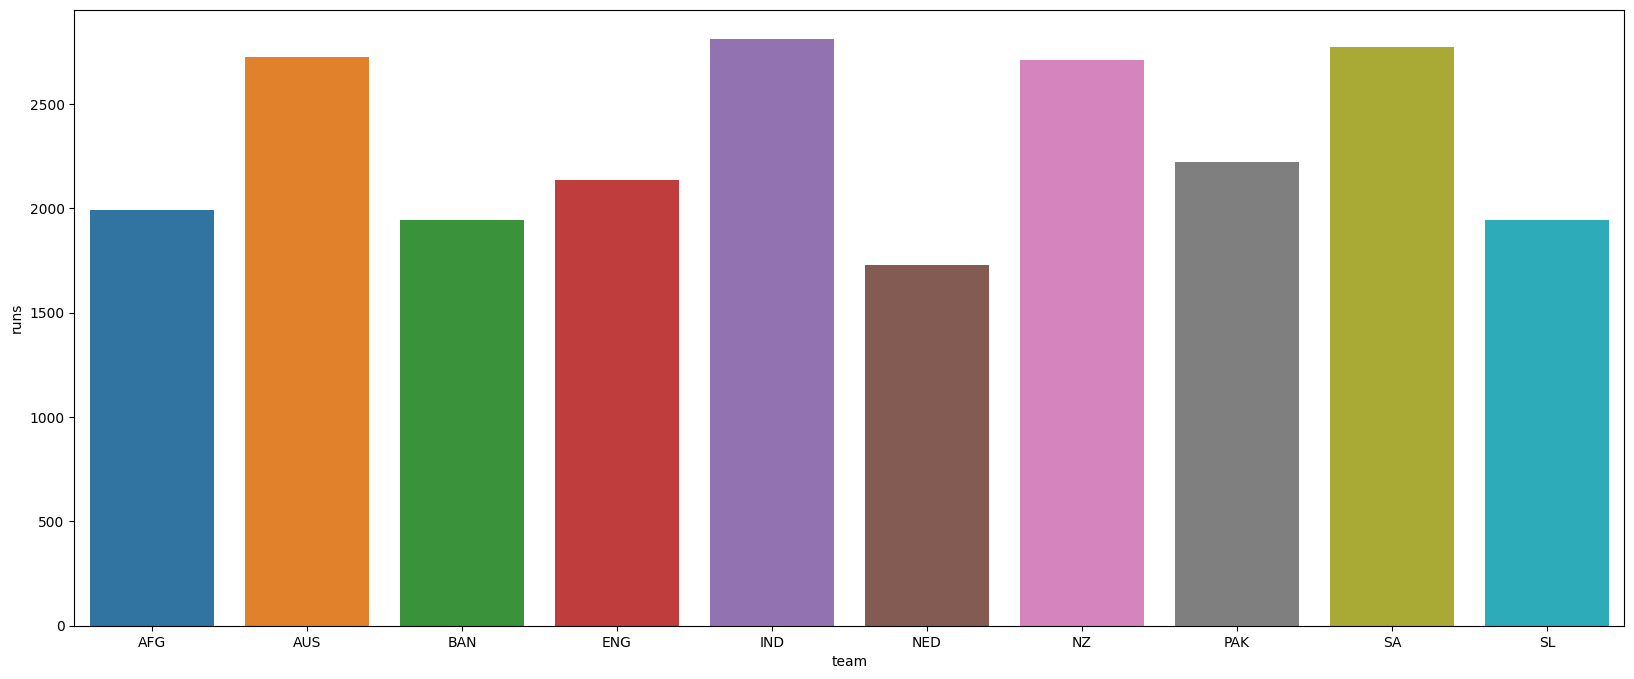

In [58]:
# show teams in bar graph
sns.barplot(data=allTeamperf,x='team',y='runs')
plt.show()

#### top 10 team by strikeRate

In [59]:
top_10_TmBysr=allTeamperf.sort_values(by=['sr'],ascending=False).head(10)
top_10_TmBysr

,team,runs,bb_bf,sr,inns,4s,6s
3,ENG,2135,2277,8761.94,140,216.0,51.0
8,SA,2773,2787,8564.56,127,243.0,99.0
1,AUS,2722,2787,7958.13,133,265.0,92.0
6,NZ,2712,2616,7860.37,127,265.0,82.0
5,NED,1728,2300,6639.31,153,163.0,33.0
4,IND,2810,2685,6617.13,94,265.0,89.0
2,BAN,1944,2459,6569.27,136,188.0,43.0
7,PAK,2220,2309,6496.43,112,220.0,60.0
0,AFG,1990,2392,5745.98,99,178.0,42.0
9,SL,1942,2257,5611.12,117,201.0,45.0


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


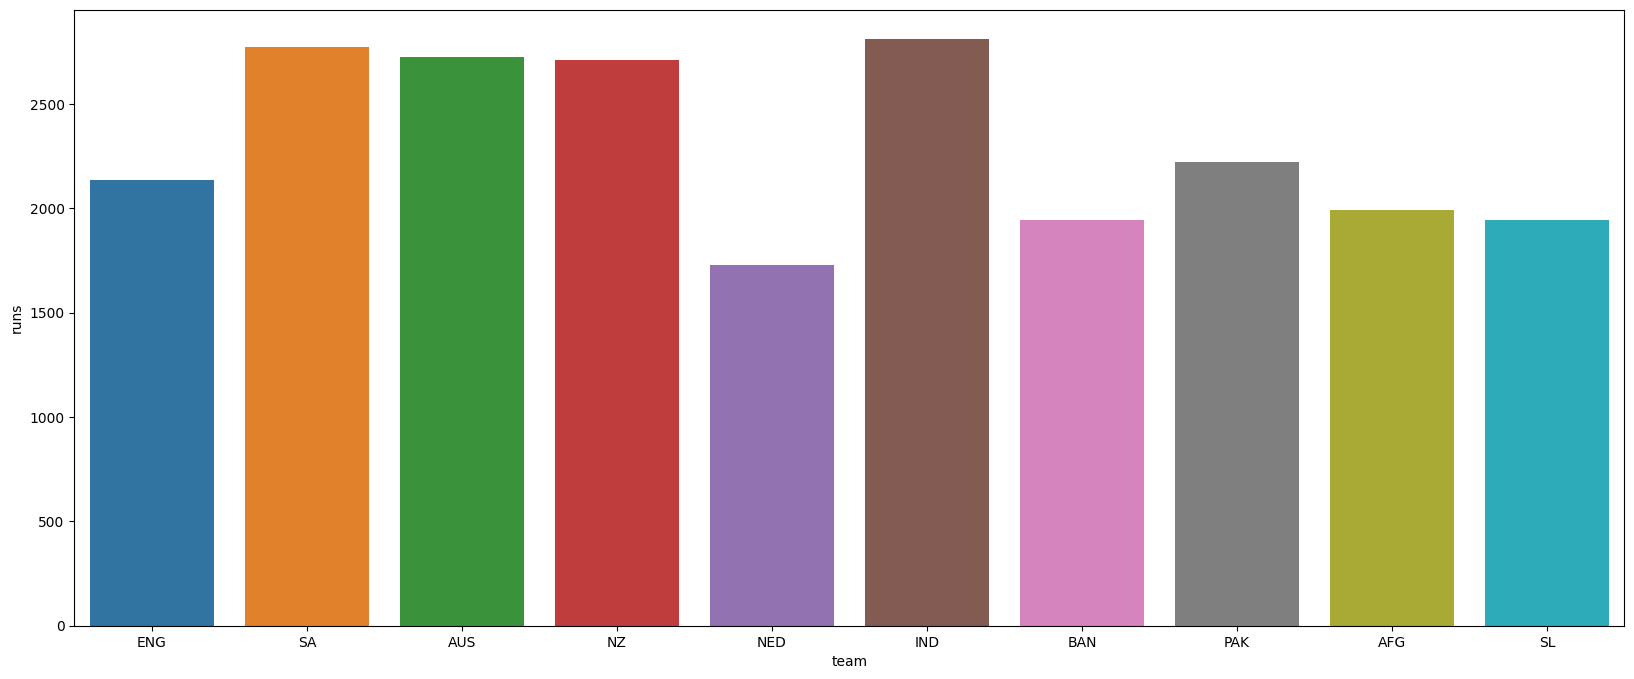

In [60]:
# showing in bar plot
sns.barplot(data=top_10_TmBysr,x='team',y='runs')
plt.show()

In [61]:
df_batsman.columns

Index(['team', 'player', 'Batsman', 'bb_bf', 'runs', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins', 'starting_day', 'starting_month', 'starting_year'],
      dtype='object')

### showing player total runs against different opponent teams

In [62]:
batsman_run_aginst_team=df_batsman.groupby(['player','opposition'])['runs'].sum().reset_index()
batsman_run_aginst_team

,player,opposition,runs
0,A Dutt (NED),v Afghanistan,10
1,A Dutt (NED),v Australia,1
2,A Dutt (NED),v Bangladesh,9
3,A Dutt (NED),v England,1
4,A Dutt (NED),v India,5
...,...,...,...
811,WA Young (NZ),v Australia,32
812,WA Young (NZ),v England,0
813,WA Young (NZ),v India,17
814,WA Young (NZ),v Netherlands,70


##### top 10 player who make more runs against different teams

In [63]:
top_10_performer=batsman_run_aginst_team.sort_values(by='runs',ascending=False).head(10)
top_10_performer

,player,opposition,runs
159,DJ Mitchell (NZ),v India,264
796,V Kohli (IND),v New Zealand,212
209,GJ Maxwell (AUS),v Afghanistan,201
460,MR Marsh (AUS),v Bangladesh,177
584,Q de Kock (SA),v Bangladesh,174
144,DA Warner (AUS),v Pakistan,163
183,DP Conway (NZ),v England,152
149,DJ Malan (ENG),v Bangladesh,140
698,SS Iyer (IND),v New Zealand,138
237,HE van der Dussen (SA),v New Zealand,133


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


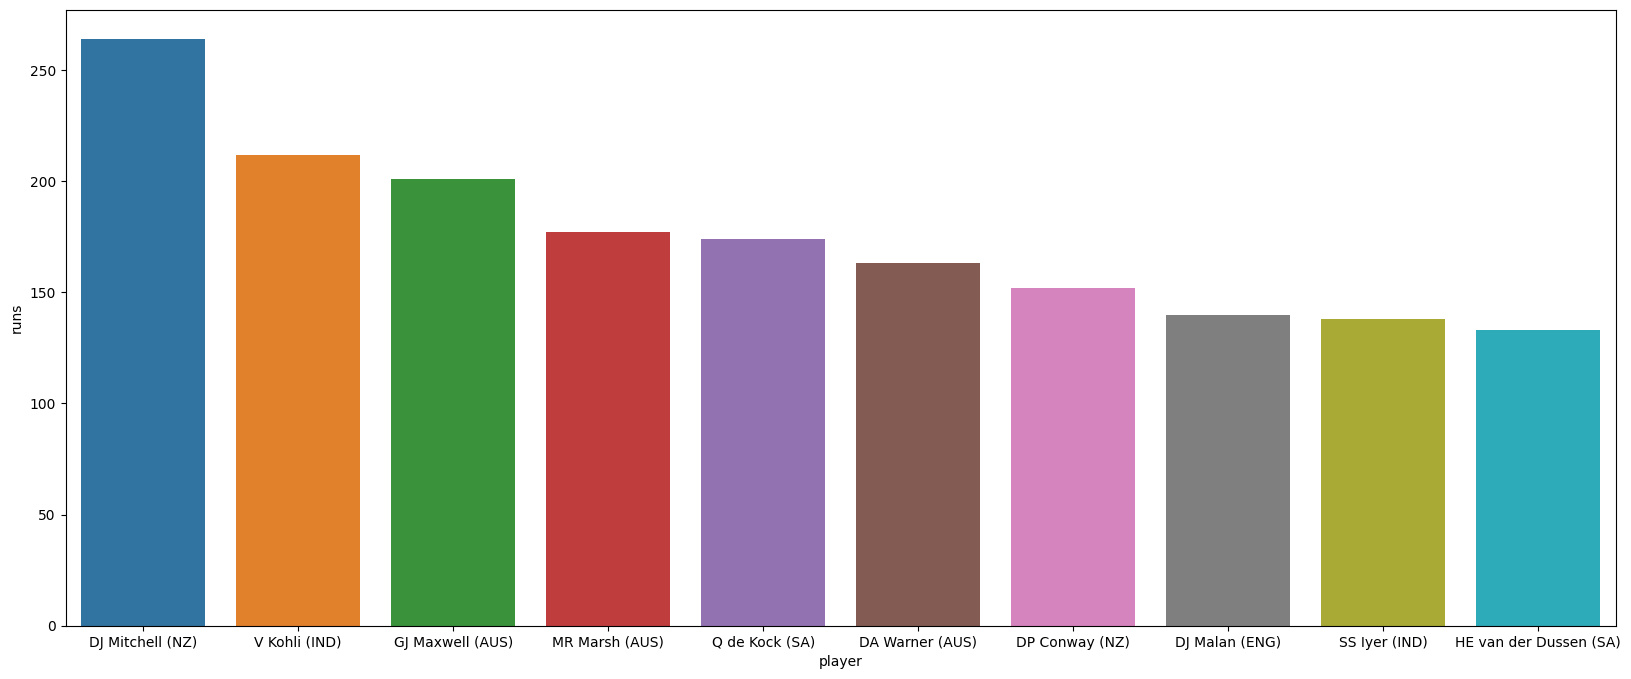

In [64]:
# showing data in bar plot using sea born........
sns.barplot(data=top_10_performer,x='player',y='runs')
plt.show()

# EDA for ground

In [65]:
df_batsman.columns

Index(['team', 'player', 'Batsman', 'bb_bf', 'runs', 'wicketball_prob',
       'runs_per_ball', 'opposition', 'ground', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins', 'starting_day', 'starting_month', 'starting_year'],
      dtype='object')

####  seeing insight which player how many runs against which team in wich ground

In [66]:

runs_in_ground=df_batsman.groupby(['ground','player','opposition']).agg({'runs':'max'}).reset_index()
runs_in_ground

,ground,player,opposition,runs
0,Ahmedabad,A Zampa (AUS),v England,29
1,Ahmedabad,AK Markram (SA),v Afghanistan,25
2,Ahmedabad,AL Phehlukwayo (SA),v Afghanistan,39
3,Ahmedabad,AU Rashid (ENG),v Australia,20
4,Ahmedabad,AU Rashid (ENG),v New Zealand,15
...,...,...,...,...
839,Wankhede,TM Head (AUS),v Afghanistan,0
840,Wankhede,TWM Latham (NZ),v India,0
841,Wankhede,Tanzid Hasan (BAN),v South Africa,12
842,Wankhede,V Kohli (IND),v New Zealand,117


In [81]:
# here i want to see the performance of king virat kohli
runs_in_ground[runs_in_ground['player']=='V Kohli (IND)']

,ground,player,opposition,runs
67,Ahmedabad,V Kohli (IND),v Pakistan,16
149,Bengaluru,V Kohli (IND),v Netherlands,51
234,Chennai,V Kohli (IND),v Australia,85
328,Delhi,V Kohli (IND),v Afghanistan,55
423,Dharamsala,V Kohli (IND),v New Zealand,95
521,Eden Gardens,V Kohli (IND),v South Africa,101
669,Lucknow,V Kohli (IND),v England,0
751,Pune,V Kohli (IND),v Bangladesh,103
842,Wankhede,V Kohli (IND),v New Zealand,117
843,Wankhede,V Kohli (IND),v Sri Lanka,88


In [68]:
# here i want to see the performance of king Babar Azam.
runs_in_ground[runs_in_ground['player']=='Babar Azam (PAK)']

,ground,player,opposition,runs
8,Ahmedabad,Babar Azam (PAK),v India,50
80,Bengaluru,Babar Azam (PAK),v Australia,18
81,Bengaluru,Babar Azam (PAK),v New Zealand,66
157,Chennai,Babar Azam (PAK),v Afghanistan,74
158,Chennai,Babar Azam (PAK),v South Africa,50
437,Eden Gardens,Babar Azam (PAK),v Bangladesh,9
438,Eden Gardens,Babar Azam (PAK),v England,38
532,Hyderabad,Babar Azam (PAK),v Netherlands,5
533,Hyderabad,Babar Azam (PAK),v Sri Lanka,10


In [69]:
top_runs_in_ground=runs_in_ground.sort_values(by='runs',ascending=False).head(10)
top_runs_in_ground

,ground,player,opposition,runs
774,Wankhede,GJ Maxwell (AUS),v Afghanistan,201
712,Pune,MR Marsh (AUS),v Bangladesh,177
817,Wankhede,Q de Kock (SA),v Bangladesh,174
86,Bengaluru,DA Warner (AUS),v Pakistan,163
17,Ahmedabad,DP Conway (NZ),v England,152
341,Dharamsala,DJ Malan (ENG),v Bangladesh,140
768,Wankhede,DJ Mitchell (NZ),v India,134
696,Pune,HE van der Dussen (SA),v New Zealand,133
561,Hyderabad,Mohammad Rizwan (PAK),v Sri Lanka,131
308,Delhi,RG Sharma (IND),v Afghanistan,131


In [70]:
team_avg_runs=df_batsman.groupby(['ground','team']).agg({'runs':'mean'}).reset_index()
team_avg_runs

,ground,team,runs
0,Ahmedabad,AFG,20.818182
1,Ahmedabad,AUS,25.090909
2,Ahmedabad,ENG,24.523810
3,Ahmedabad,IND,38.000000
4,Ahmedabad,NZ,91.666667
...,...,...,...
67,Wankhede,ENG,15.500000
68,Wankhede,IND,48.400000
69,Wankhede,NZ,27.090909
70,Wankhede,SA,47.250000


In [71]:
top_5_team=team_avg_runs.sort_values(by='runs',ascending=False).head(5)
top_5_team

,ground,team,runs
4,Ahmedabad,NZ,91.666667
56,Pune,AUS,75.750000
9,Bengaluru,IND,65.833333
25,Delhi,IND,64.500000
27,Delhi,SA,57.857143


### observation:
1. In Ahmedabad	NZ performing well
2. IN Pune	AUS performing well
3.  IN Bengaluru	IND performing well
4.  IN Delhi	IND performing well
5.  IN Delhi	SA performing well